In [11]:
import os
import osmnx as ox
from pathlib import Path

from iterative_csv_save import save_to_csv

In [12]:
def transform_graph_to_dataframes(graph):
    gdf_nodes, gdf_relationships = ox.graph_to_gdfs(graph)
    gdf_nodes.reset_index(inplace=True)
    gdf_relationships.reset_index(inplace=True)
    
    relationships = gdf_relationships[["u", "v", "osmid", "length", "name", "highway", "geometry"]].copy()
    relationships = relationships.rename(columns={"u": "source", "v": "target"})
    nodes = gdf_nodes[["osmid", "geometry"]].copy()
    edge_table_sql = relationships.copy()
    
    nodes["x"] = nodes.apply(lambda x: x.geometry.coords.xy[0][0], axis=1)
    nodes["y"] = nodes.apply(lambda x: x.geometry.coords.xy[1][0], axis=1)

    edge_table_sql["x1"] = edge_table_sql.apply(lambda x: x.geometry.coords.xy[0][0], axis=1)
    edge_table_sql["y1"] = edge_table_sql.apply(lambda x: x.geometry.coords.xy[1][0], axis=1)
    edge_table_sql["x2"] = edge_table_sql.apply(lambda x: x.geometry.coords.xy[0][1], axis=1)
    edge_table_sql["y2"] = edge_table_sql.apply(lambda x: x.geometry.coords.xy[1][1], axis=1)
    
    
    nodes = nodes.drop(columns=["geometry"])
    relationships = relationships.drop(columns=["geometry"])
    edge_table_sql = edge_table_sql.drop(columns=["geometry"])
    
    return nodes, relationships, edge_table_sql


### Graph from place with distance

In [2]:
G_krakow_big = ox.graph_from_address("Krakow", dist=20000, dist_type="network", network_type="all", simplify=False)

In [3]:
print(G_krakow_big)

MultiDiGraph with 548632 nodes and 1167968 edges


In [22]:
# fig, ax = ox.plot_graph(G_krakow_big, node_size=0.5, edge_linewidth=0.1)

### Graph from place

In [4]:
G_krakow = ox.graph_from_place("Kraków", network_type="all", simplify=False)

In [3]:
print(G_krakow)

MultiDiGraph with 333120 nodes and 721628 edges


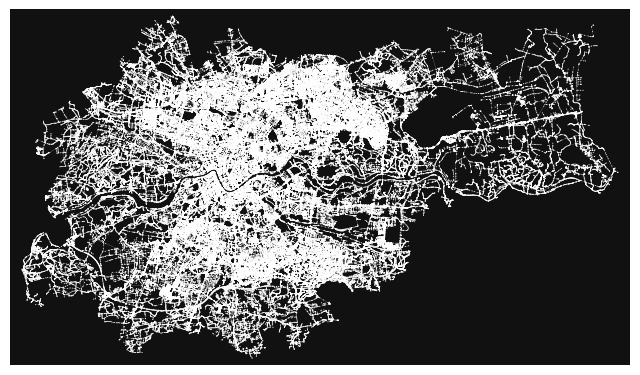

In [5]:
fig, ax = ox.plot_graph(G_krakow, node_size=0.5, edge_linewidth=0.1)

In [6]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G_krakow)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

In [7]:
gdf_nodes.head()

,osmid,y,x,street_count,highway,ref,geometry
0,13822575,50.082051,20.032569,4,NaN,NaN,POINT (20.03257 50.08205)
1,13822576,50.080695,20.034350,3,NaN,NaN,POINT (20.03435 50.08069)
2,13822577,50.079400,20.036068,3,NaN,NaN,POINT (20.03607 50.07940)
3,13822581,50.081723,20.036520,2,NaN,NaN,POINT (20.03652 50.08172)
4,13822694,50.081361,20.035596,4,NaN,NaN,POINT (20.03560 50.08136)


In [8]:
gdf_relationships.head()

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,junction,service,access,width,bridge,tunnel,est_width,geometry
0,13822575,965423962,0,25042019,True,2,776,Kocmyrzowska,secondary,50,False,18.886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03277 50.08216)"
1,13822575,8284483157,0,148469683,False,2,NaN,Obrońców Krzyża,tertiary,50,True,8.987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03249 50.08211)"
2,13822575,777395552,0,997754503,False,3,NaN,Obrońców Krzyża,tertiary,50,True,13.867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03257 50.08205, 20.03270 50.08196)"
3,13822576,1234198750,0,2954554,False,NaN,NaN,Ignacego Mościckiego,residential,40,False,14.652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03435 50.08069, 20.03451 50.08078)"
4,13822576,5339146823,0,553072298,False,2,NaN,Obrońców Krzyża,tertiary,50,True,24.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (20.03435 50.08069, 20.03413 50.08086)"


### Save chosen graph to csv

In [9]:
filename = "krakow_test"
csv_paths = f"./data/{filename}"
Path(csv_paths).mkdir(exist_ok=True, parents=True)
os.system(f"rm {csv_paths}/*")

1

In [13]:
nodes, relationships, edge_table_sql = transform_graph_to_dataframes(G_krakow)

In [14]:
save_to_csv(nodes, relationships, edge_table_sql, csv_paths)